Implement two layer Feed Forward Neural Network for XOR Logic Gate with 2-bit Binary 
Input using Sigmoid activation. Verify the number of learnable parameters in the model. 

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [2]:
x=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y=torch.tensor([0,1,1,0],dtype=torch.float32)

In [3]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.layer1=nn.Linear(2,2,bias=True)
        self.layer2=nn.Linear(2,1,bias=True)
        self.activation=nn.Sigmoid()
    def forward(self,x):
        x=self.layer1(x)
        x=self.activation(x)
        x=self.layer2(x)
        return x


In [4]:
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.x=X
        self.y=Y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [5]:
epochs=10000
model=XORModel()

In [6]:
dataset=MyDataset(x,y)
bsize=1
trainData=DataLoader(dataset,batch_size=bsize,shuffle=True)
lossfn=nn.MSELoss()
lossList=[]
optimizer=torch.optim.SGD(model.parameters(),lr=0.03)

c:\Dell\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
for epoch in range(epochs):
    model.train(True)
    totalloss=0.0
    for i,data in enumerate(trainData):
        ip,op=data
        optimizer.zero_grad()
        ypred=model(ip)
        loss=lossfn(ypred,op)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    avgloss=totalloss/dataset.__len__()*bsize
    lossList.append(avgloss)
    if(epoch%1000==0 or epoch==epochs-1):
        print(f"{epoch}-->{avgloss}")

c:\Dell\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0-->0.2745182514190674
1000-->0.26756130903959274
2000-->0.10749923903495073
3000-->5.585552543152517e-06
4000-->3.5641711804146325e-11
5000-->7.502443111206958e-12
6000-->6.899369964230573e-12
7000-->7.72892860823049e-12
8000-->7.315925643069932e-12
9000-->6.746603276042151e-12
9999-->6.758149595498253e-12


In [8]:
test=torch.tensor([1,1],dtype=torch.float32)
model.eval()
res=model(test)
print(f"{test}-->{torch.round(res[0])}")
print(f"{test}-->{res[0]}")

tensor([1., 1.])-->0.0
tensor([1., 1.])-->3.3974647521972656e-06


Text(0, 0.5, 'loss')

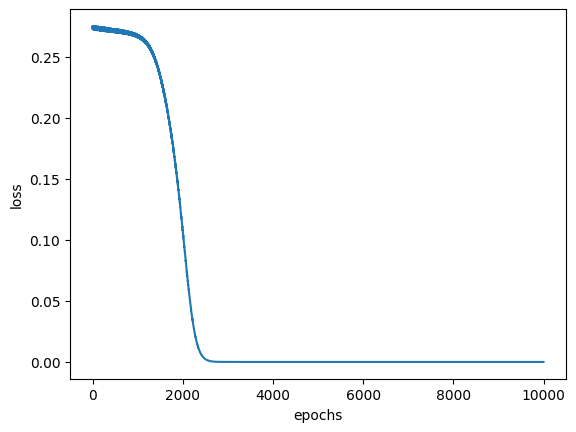

In [9]:
import matplotlib.pyplot as plt
plt.plot(lossList)
plt.xlabel('epochs')
plt.ylabel('loss')